In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea

In [58]:
#Loading the dataset and converting into dataframe#
df_loan=pd.read_csv('/Users/manjunathap/Downloads/loan.csv')

/var/folders/3z/g05jkt197v7dw9pq5rmnb4400000gn/T/ipykernel_37883/464575867.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan=pd.read_csv('/Users/manjunathap/Downloads/loan.csv')


### Data Cleaning ###

In [59]:
#check the shape of the dataset#
df_loan.shape

(39717, 111)

In [60]:
#outputing the records#
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [61]:

#checking the dataypes of columns#
df_loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [62]:
#basic info#
df_loan.info()
df_loan.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [63]:
#checking the loan status columns to remove unnecessary rows#
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [64]:
#removed loan status having current because this will not be used to anayse to be not defaulted#
df_loan=df_loan[df_loan['loan_status']!='Current']
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [65]:
#checking if there any duplicate rows#
duplicate_rows=len(df_loan[df_loan.duplicated()])
duplicate_rows

0

In [66]:
#checking the nulls in columns#
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [67]:
#listing all null columns#
no_of_columns=list(df_loan.columns[df_loan.isna().all()])
no_of_columns

['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [68]:
# dropping the null columns#
df_loan=df_loan.dropna(axis=1,how='all')
df_loan.shape

(38577, 56)

In [69]:
#Removing the non imprtant columns like where data contain text#
df_loan.columns
df_loan.drop(['title','desc','url'],axis=1,inplace=True)
df_loan.shape

(38577, 53)

In [70]:
#checking the values of columns having same value for every record.
df_loan.nunique().sort_values()


tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
pymnt_plan                        1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

In [71]:
# deleting the columns values is 1.
for col in df_loan.columns:
    if df_loan[col].nunique(dropna=True) == 1:
        df_loan = df_loan.drop(col, axis=1)

In [72]:
df_loan.shape

(38577, 42)

In [73]:
#check the columns having more than 50% of nulls#
df_loan.isna().mean().round(2) >= 0.50


id                         False
member_id                  False
loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
grade                      False
sub_grade                  False
emp_title                  False
emp_length                 False
home_ownership             False
annual_inc                 False
verification_status        False
issue_d                    False
loan_status                False
purpose                    False
zip_code                   False
addr_state                 False
dti                        False
delinq_2yrs                False
earliest_cr_line           False
inq_last_6mths             False
mths_since_last_delinq      True
mths_since_last_record      True
open_acc                   False
pub_rec                    False
revol_bal                  False
revol_util                 False
total_acc 

In [74]:
#deleting the columns having more than 50% of nulls#
for col in df_loan.columns:
    if df_loan[col].isna().mean().round(2) >= 0.50:
        df_loan = df_loan.drop(col, axis=1)

In [75]:
df_loan.shape

(38577, 40)

In [76]:
#the below columns data is captured post loan approval so removing these fields.
postloan_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                           'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

df_loan=df_loan.drop(postloan_cols,axis=1)

In [77]:
df_loan.shape

(38577, 22)

In [78]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [79]:
#deleting unncessary columns which are not required for EDA#
df_loan.drop(columns=['sub_grade','emp_title','member_id'],inplace=True)
df_loan.shape

(38577, 19)

### Derived columns & Dropping Rows ###

In [80]:
df_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [81]:
df_loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [82]:
# Changing int_rate from string to float.
df_loan['int_rate']=df_loan['int_rate'].str.strip('%').astype(float)

In [83]:
df_loan['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [84]:
# changing the column loan_amnt and funded_amnt to float64
df_loan = df_loan.astype({'loan_amnt':'float','funded_amnt':'float'})
df_loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36 months,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36 months,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36 months,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36 months,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [85]:
df_loan['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [86]:
## convert to int and removing the string parts of int value 
def conv_term(term):
    return int(term.strip().split()[0])

df_loan['term'] = df_loan['term'].apply(conv_term) 
df_loan['term'].dtype

dtype('int64')

In [87]:
df_loan['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [88]:
# checking grade column values.
df_loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [89]:
# checking emp_length column values.
df_loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [90]:
print(df_loan['emp_length'])

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object


In [91]:
# for better analysis Rounding off the below columns to two decimals points.
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df_loan[col] = df_loan[col].apply(lambda x: round(x,2))
    print(df_loan[col])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [92]:
#changing issue_d`to date datatype
df_loan['issue_d'] = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [93]:
(df_loan.isnull().sum()*100)/len(df_loan)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [94]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
df_loan= df_loan[df_loan['emp_length'].notna()]
df_loan= df_loan[df_loan['pub_rec_bankruptcies'].notna()]

In [95]:
(df_loan.isnull().sum()*100)/len(df_loan) # checking nulls 

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [96]:
# Creating a dervied columns for issue month and issue year from issues date
df_loan['issue_year']=pd.DatetimeIndex(df_loan['issue_d']).year
df_loan['issue_month']=pd.DatetimeIndex(df_loan['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

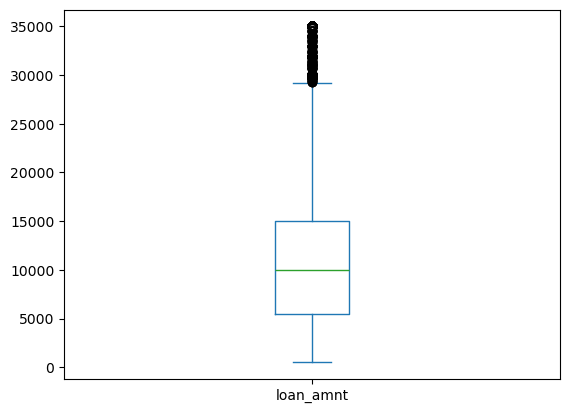

In [97]:
print(df_loan.shape)
print(df_loan["loan_amnt"].describe())
df_loan['loan_amnt'].plot(kind='box')

### Outliers ###


In [98]:
# making Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [99]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df_loan['int_rate_b'] = df_loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [100]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

df_loan['annual_inc_b'] = df_loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [101]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df_loan['dti_b'] = df_loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [102]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

df_loan['loan_amnt_b'] = df_loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [103]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

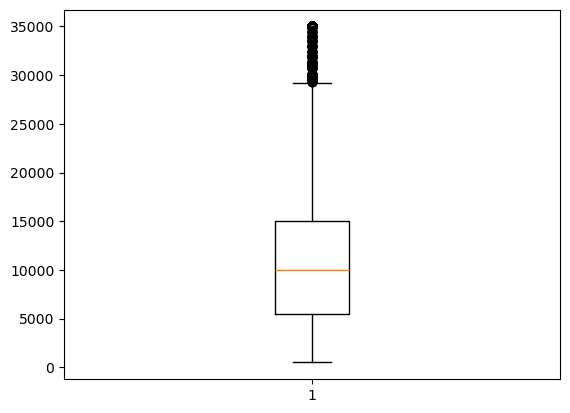

In [104]:
plot.boxplot(df_loan['loan_amnt'],)
plot.show()

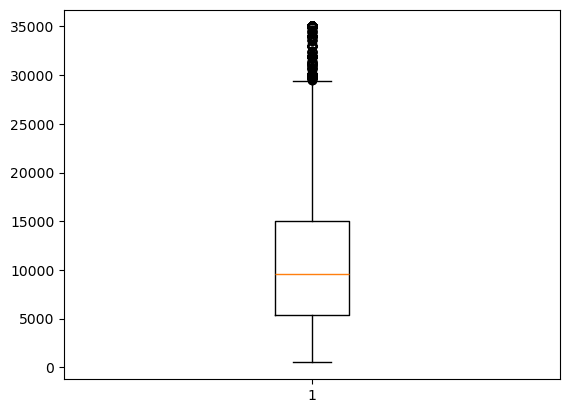

In [105]:
plot.boxplot(df_loan['funded_amnt'])
plot.show()

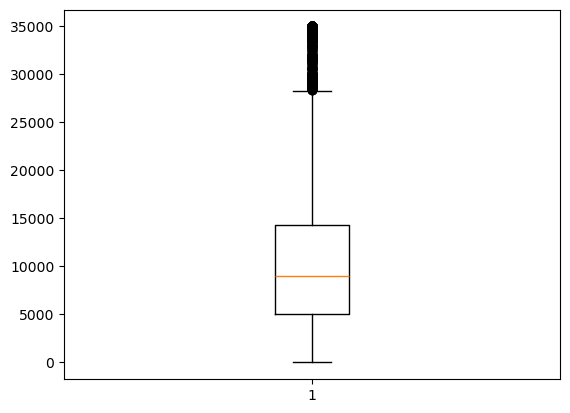

In [106]:
plot.boxplot(df_loan['funded_amnt_inv'])
plot.show()

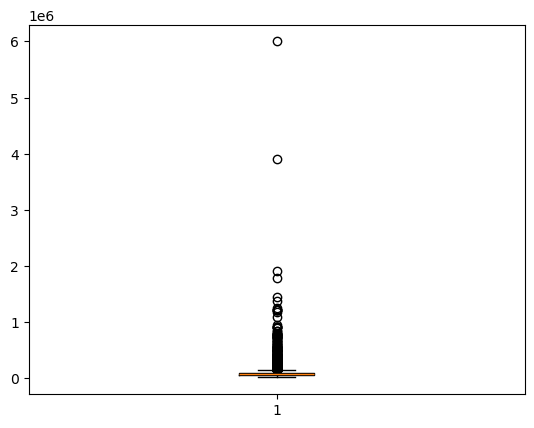

In [107]:
plot.boxplot(df_loan['annual_inc'])
plot.show()

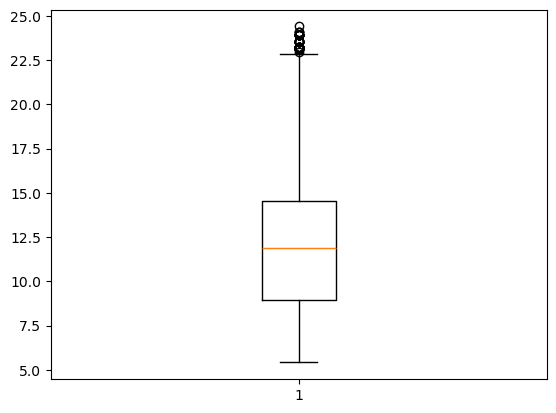

In [108]:
plot.boxplot(df_loan['int_rate'])
plot.show()

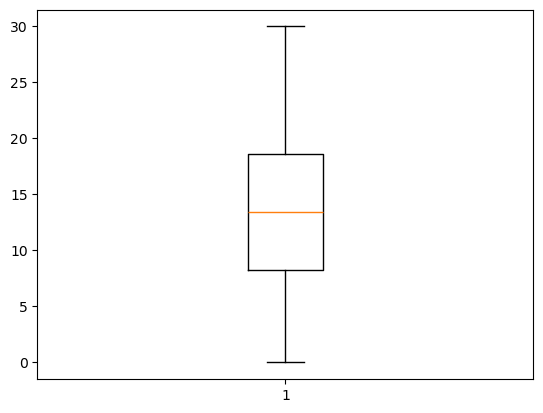

In [109]:
plot.boxplot(df_loan['dti'])
plot.show()

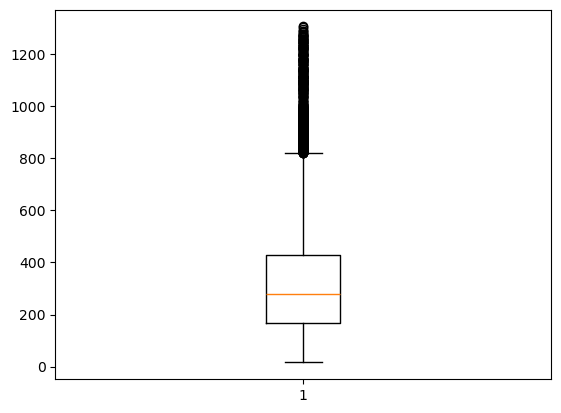

In [110]:
plot.boxplot(df_loan['installment'])
plot.show()

In [111]:
#  above box plots we can see there is outliers exists for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
#  removing the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
df_loan =remove_outliers_iqr(df_loan, outliers_columns_set1,1.5)
df_loan =remove_outliers_iqr(df_loan, outliers_columns_set2,1.5)

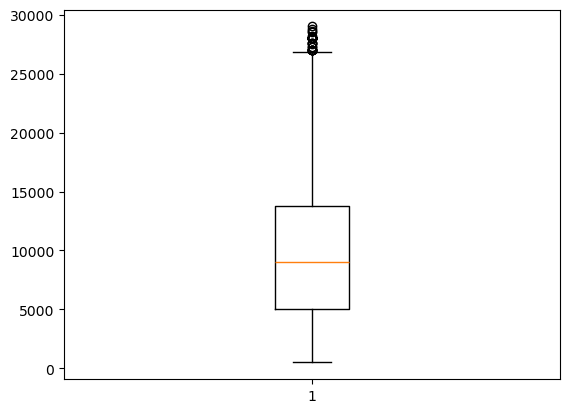

In [112]:
plot.boxplot(df_loan['loan_amnt'],)
plot.show()

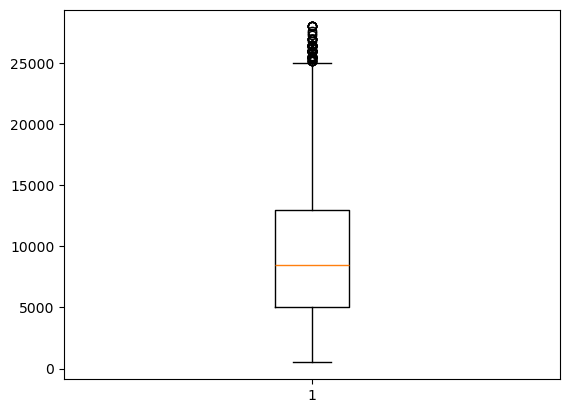

In [113]:
plot.boxplot(df_loan['funded_amnt'])
plot.show()

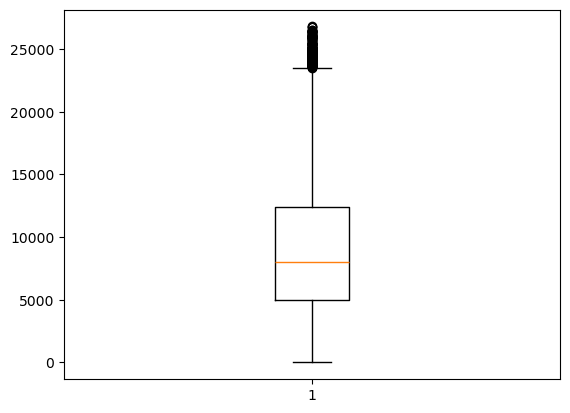

In [114]:
plot.boxplot(df_loan['funded_amnt_inv'])
plot.show()

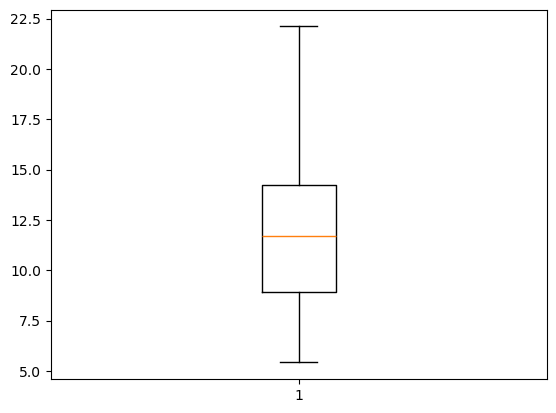

In [115]:
plot.boxplot(df_loan['int_rate'])
plot.show()

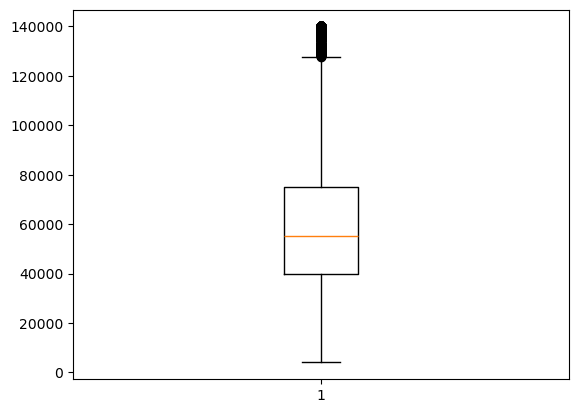

In [116]:
plot.boxplot(df_loan['annual_inc'])
plot.show()

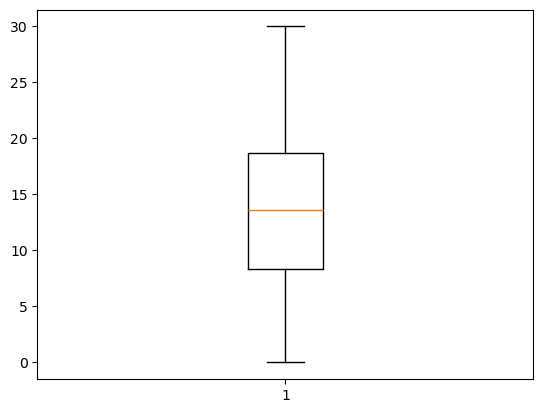

In [117]:
plot.boxplot(df_loan['dti'])
plot.show()

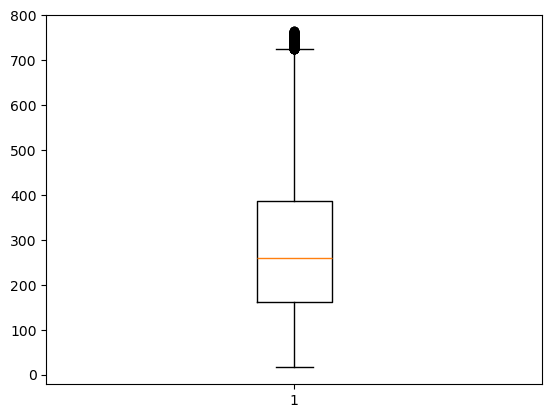

In [118]:
plot.boxplot(df_loan['installment'])
plot.show()

### Univariate Aanlysis ###

/var/folders/3z/g05jkt197v7dw9pq5rmnb4400000gn/T/ipykernel_37883/3097071712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


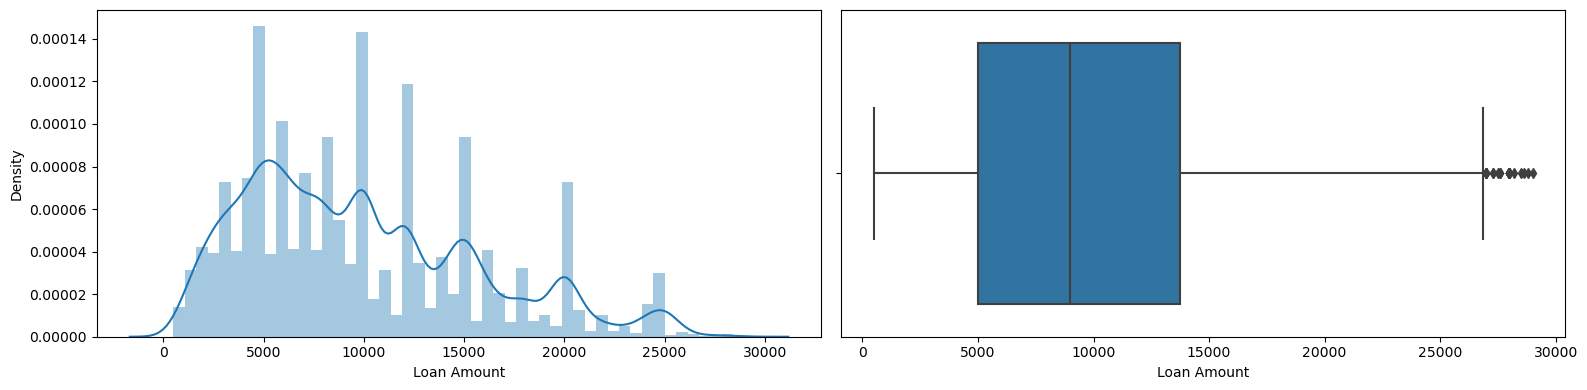

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [119]:
plot_digram(df_loan, 'loan_amnt')
df_loan['loan_amnt'].describe()

In [120]:
# observation:
# Most of the loan amount applied was in the range of 5k-14k.
# Max Loan amount applied was ~29k.

/var/folders/3z/g05jkt197v7dw9pq5rmnb4400000gn/T/ipykernel_37883/3097071712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


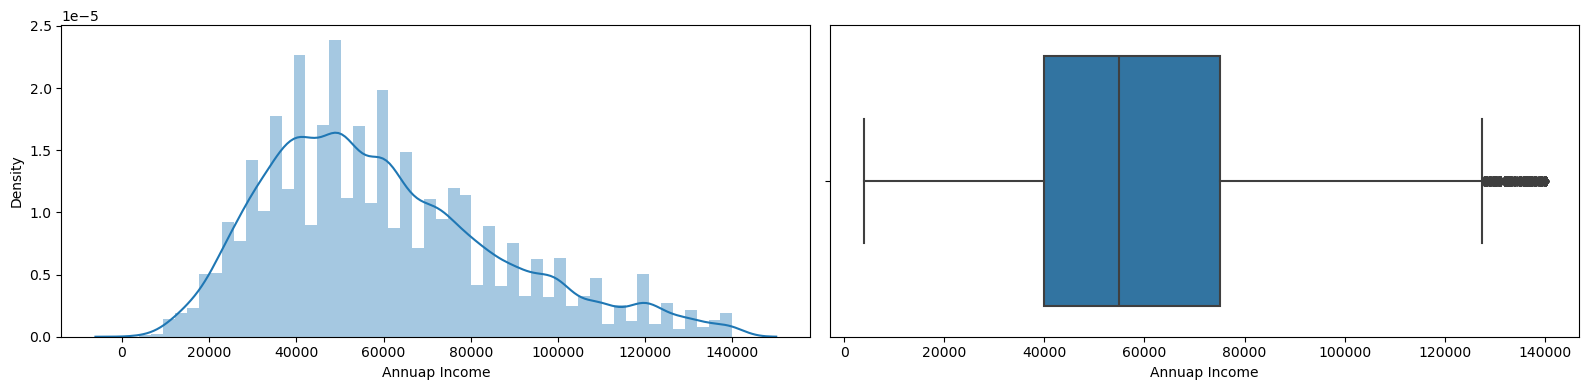

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [121]:
plot_digram(df_loan, 'annual_inc')
df_loan['annual_inc'].describe()

In [122]:
# observation
# The Annual income of most of applicants lies between 40k-75k.

/var/folders/3z/g05jkt197v7dw9pq5rmnb4400000gn/T/ipykernel_37883/3097071712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


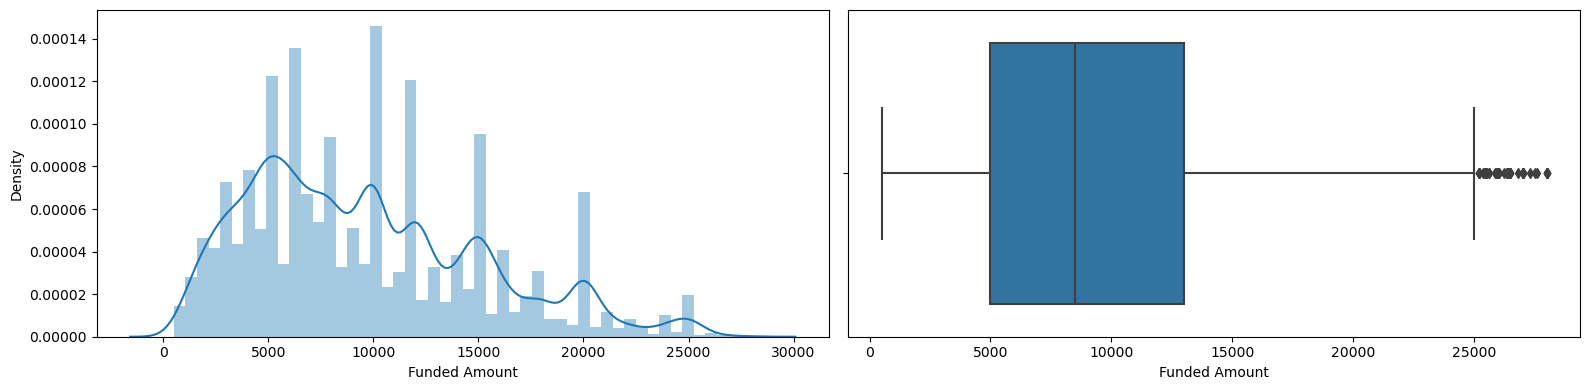

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [123]:
plot_digram(df_loan, 'funded_amnt')
df_loan['funded_amnt'].describe()

/var/folders/3z/g05jkt197v7dw9pq5rmnb4400000gn/T/ipykernel_37883/3097071712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


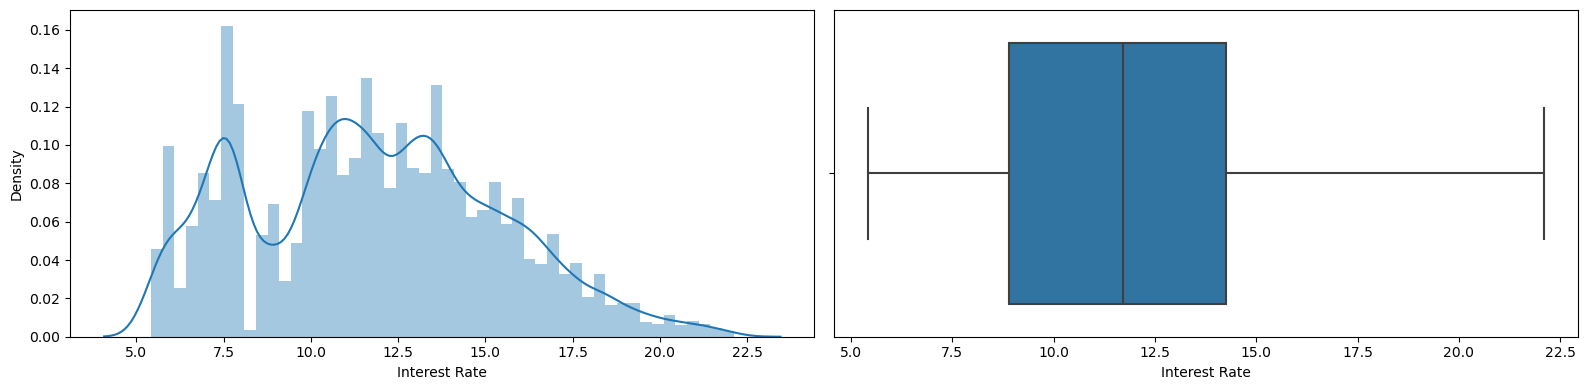

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [124]:
plot_digram(df_loan, 'int_rate')
df_loan['int_rate'].describe()

In [125]:
# observation
# Most of the applicant's rate of interest is between in the range of 8%-14%.
# Average Rate of interest is 11.7 %

<Axes: xlabel='home_ownership'>

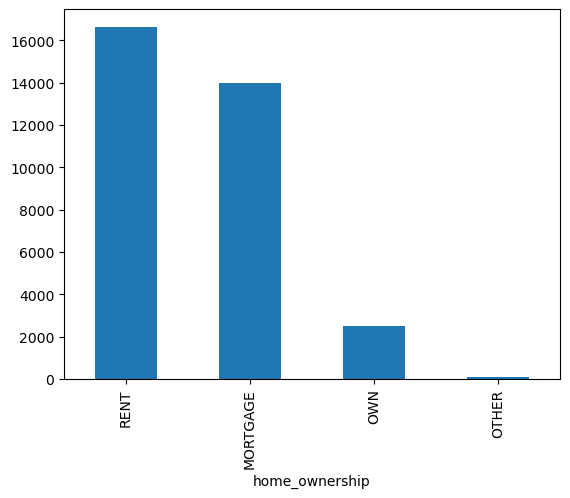

In [126]:
df_loan['home_ownership'].value_counts().plot.bar()

In [127]:
# Majority of loan applicants are either living on Rent or on Mortgage

<Axes: xlabel='purpose'>

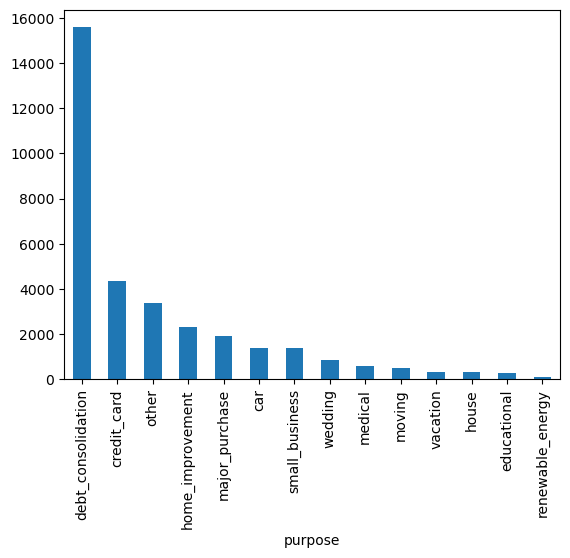

In [128]:
df_loan['purpose'].value_counts().plot.bar()

In [129]:
# Most of the loan applicants are for debt_consolidations.

In [130]:
Failed_per_houseowner_ship=df_loan
Failed_per_houseowner_ship["loan_status"].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

<Axes: ylabel='count'>

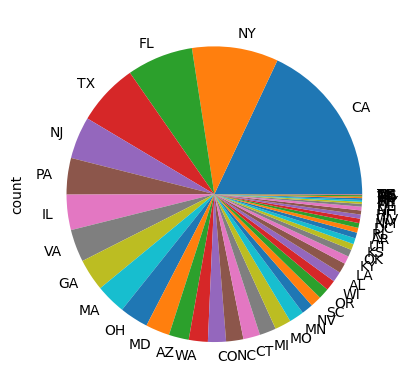

In [131]:
# using Pie plot to visualize
df_loan['addr_state'].value_counts().plot(kind="pie")

In [132]:
# Most of the Loan applicants are from CA(State).

<Axes: ylabel='count'>

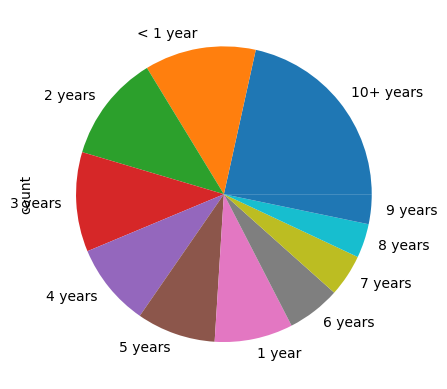

In [133]:
df_loan['emp_length'].value_counts().plot(kind="pie")

In [134]:
# Most of the applications are having 10+ yrs of Exp.

### Bivariate Analysis ###

In [135]:
#Bivariate Analysis on annual income against Chargedoff_Proportion 

inc_range_vs_loan = df_loan.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


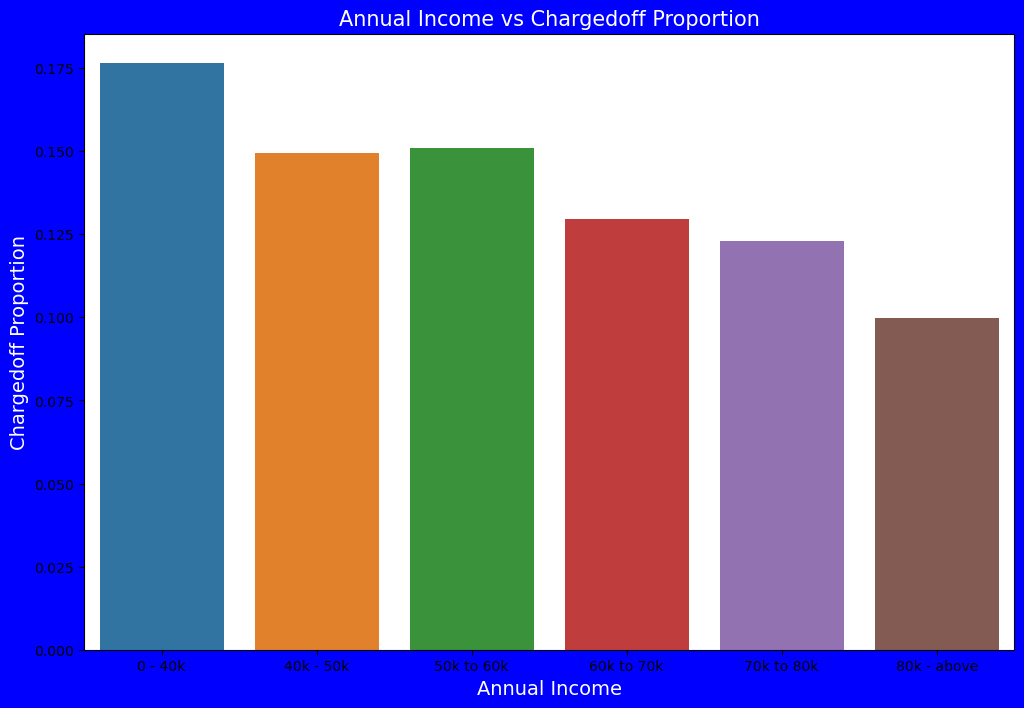

In [136]:
# drawing bar plots on data from aboveto visualize the pattern to understand the data.

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()


In [137]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [138]:
#Bivariate Analysis on Interest rate  against Chargedoff_Proportion 

interest_vs_loan = df_loan.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


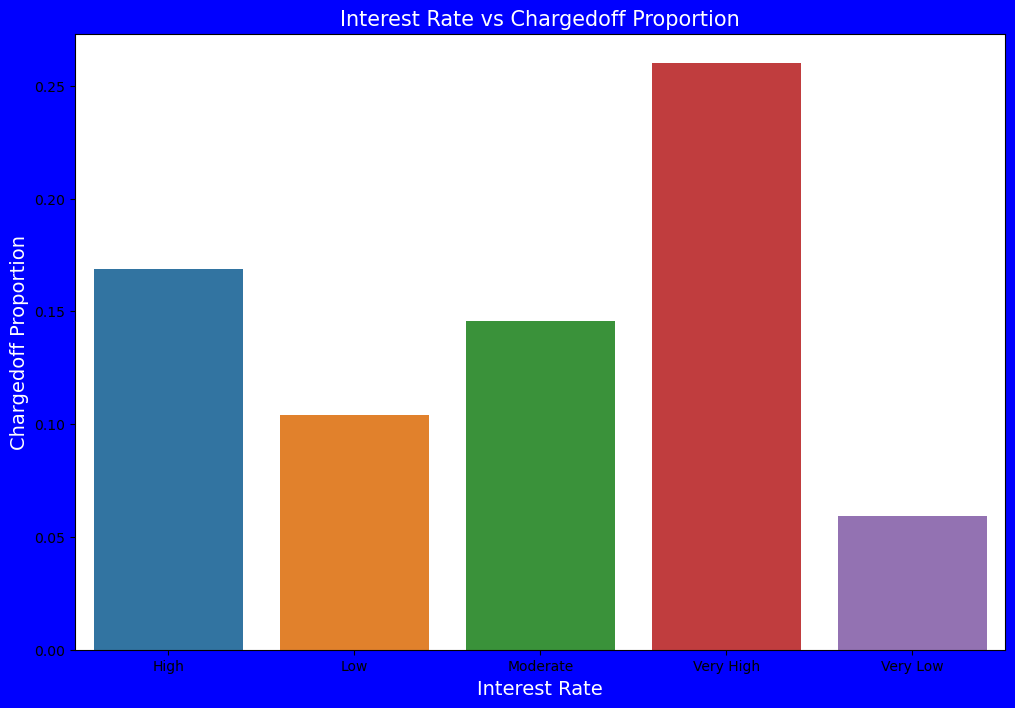

In [139]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [140]:
# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Interest rates are starting from min 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [141]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion 

home_ownership_vs_loan = df_loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


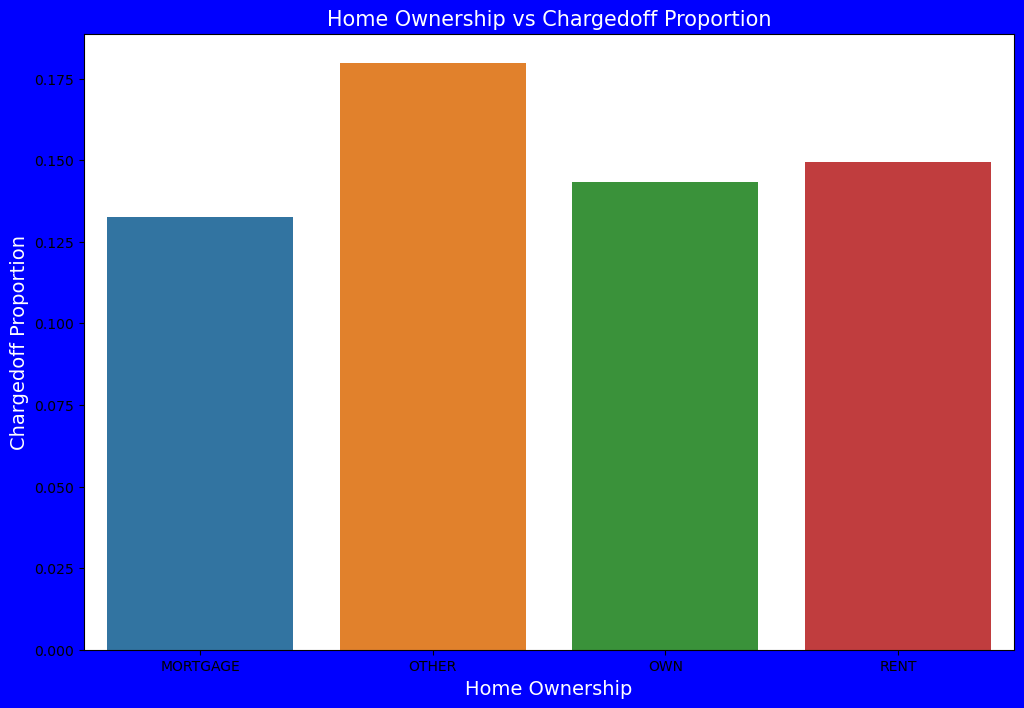

In [142]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [143]:
# observation:
# inference form the houseowner variable those who are not owning the house are most likely to be charged off.


In [144]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion 

purpose_vs_loan = df_loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


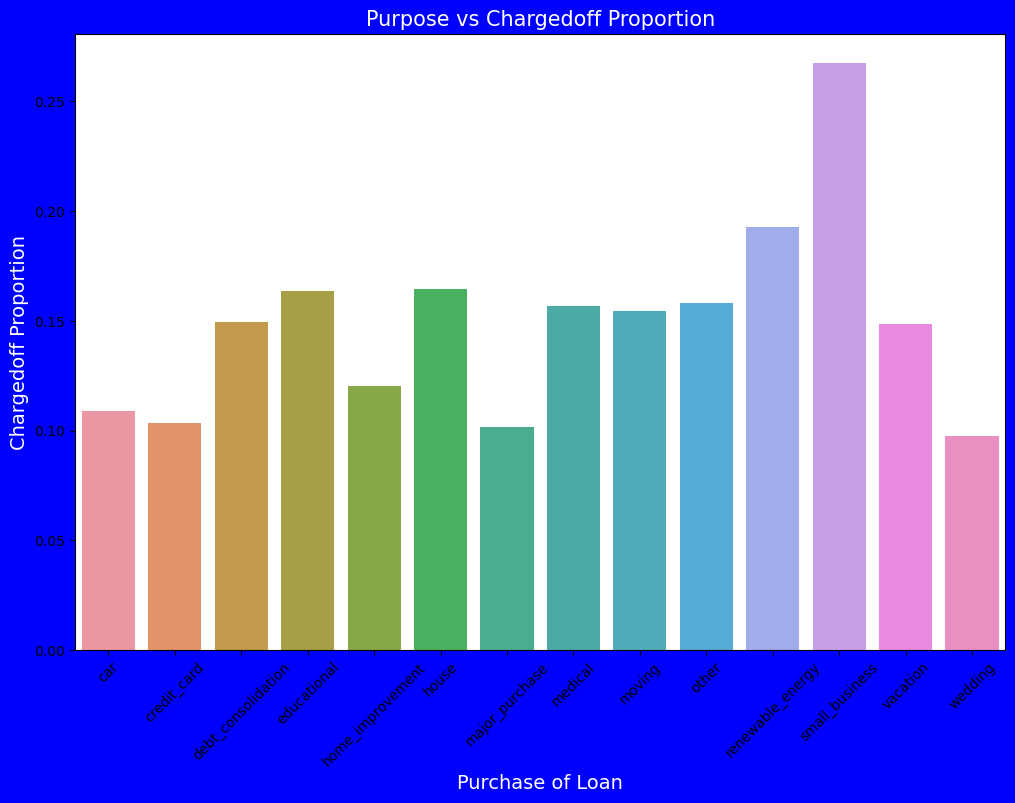

In [145]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [146]:
# observation
# Those applicants who is having home loan is having low chances of loan defaults.
# Those applicants having loan for small bussiness is having high chances for loan defaults.

In [147]:
#Bivariate Analysis on DTI against Chargedoff_Proportion 

dti_vs_loan = df_loan.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


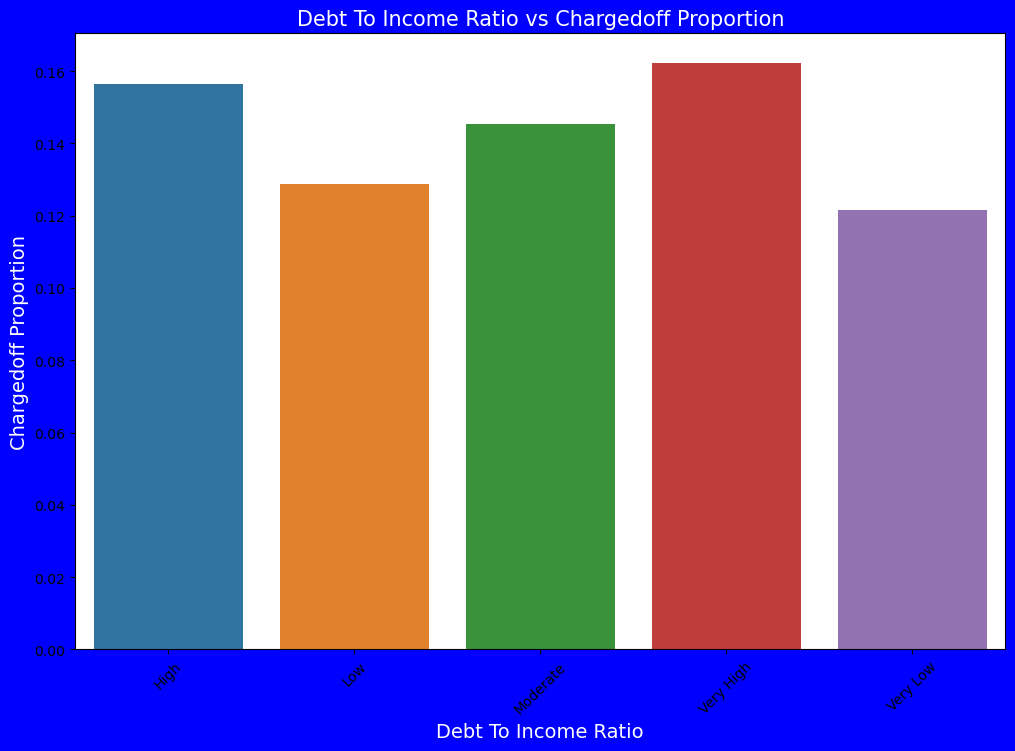

In [148]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [149]:
# Observation:
# High DTI value  having high risk of defaults
# Lower the DTO having low chances loan defaults.

In [150]:
df_loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

In [151]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion 
pub_rec_bankruptcies_vs_loan = df_loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,308,1137,1445,0.213149
0,0.0,4404,27337,31741,0.138748


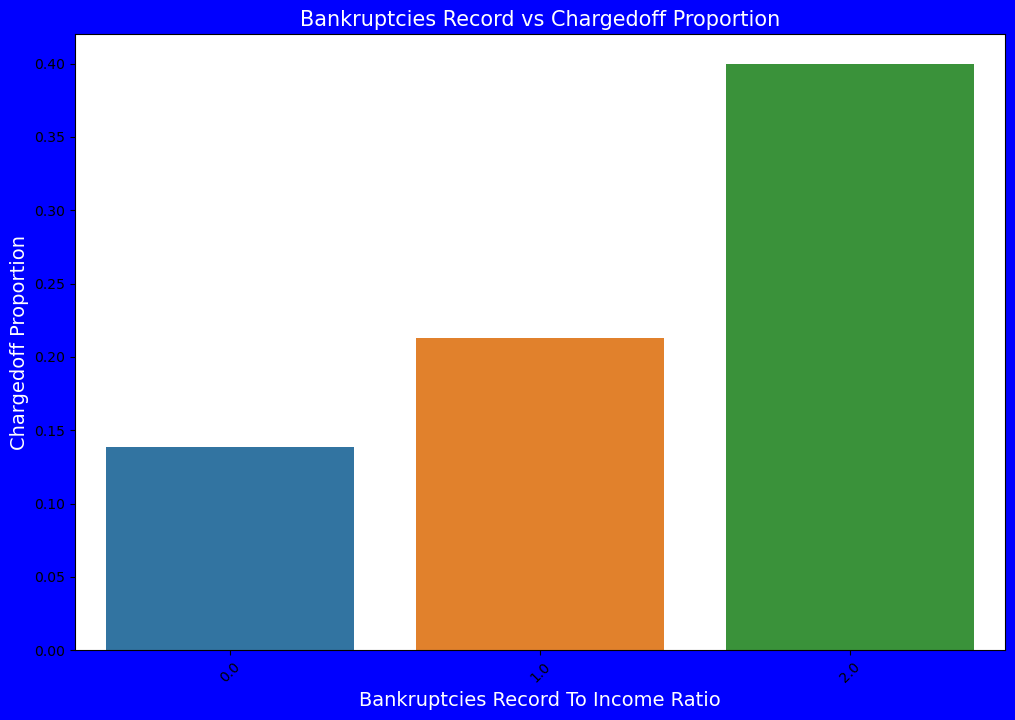

In [152]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [153]:
# Observations:
# Bankruptcies Record with 2 is having high impact on loan defaults
# Bankruptcies Record with 0 is low impact on loan defaults
# Lower the Bankruptcies lower the risk.

In [154]:
#Bivariate Analysis on Issues of Year  against Chargedoff_Proportion 

issue_year_vs_loan = df_loan.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,2,5,7,0.285714
4,2011,2705,14788,17493,0.154633
1,2008,158,880,1038,0.152216
3,2010,1312,9012,10324,0.127083
2,2009,537,3792,4329,0.124047


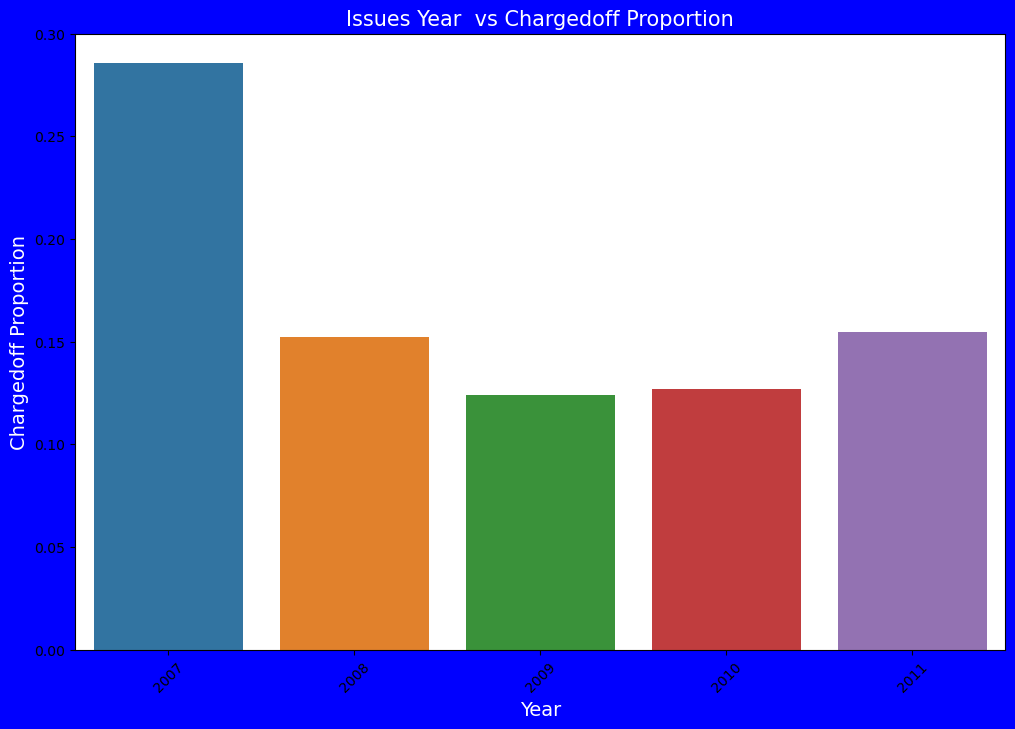

In [155]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [156]:
# observation
# Year 2007 is highest loan defaults.
# 2009 is having lowest loan defaults.

In [157]:
#Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion 

issue_month_vs_loan = df_loan.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
8,9,477,2531,3008,0.158577
11,12,567,3034,3601,0.157456
4,5,401,2188,2589,0.154886
9,10,462,2693,3155,0.146434
5,6,410,2390,2800,0.146429
10,11,494,2976,3470,0.142363
6,7,415,2534,2949,0.140726
7,8,405,2562,2967,0.136502
0,1,260,1724,1984,0.131048
3,4,317,2176,2493,0.127156


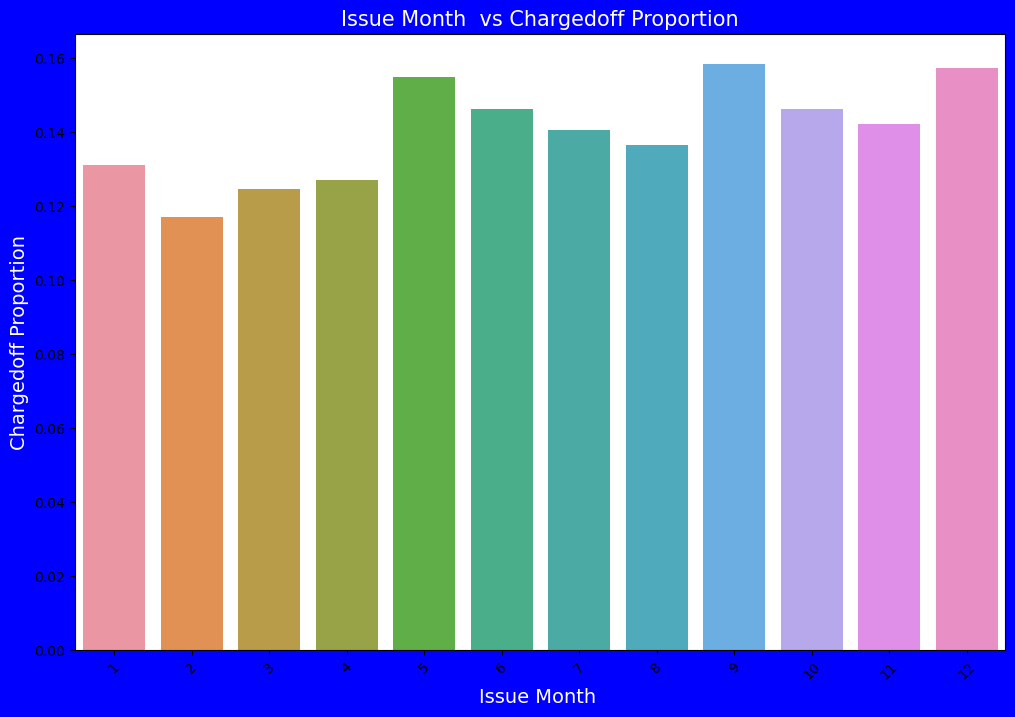

In [158]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [159]:
# observation
#  Those loan has been issued in May, September and december is having high number of loan defaults
# Those loan has been issued in month of February is having high number of loan defaults
# Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

In [160]:
#Bivariate Analysis on Address state  against Chargedoff_Proportion 

addr_state_vs_loan = df_loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
40,TN,2.0,7.0,9.0,0.222222
31,NV,87.0,328.0,415.0,0.209639
11,HI,28.0,119.0,147.0,0.190476
0,AK,12.0,51.0,63.0,0.190476
39,SD,11.0,48.0,59.0,0.186441
30,NM,28.0,133.0,161.0,0.173913
9,FL,414.0,1990.0,2404.0,0.172213
23,MO,99.0,492.0,591.0,0.167513
35,OR,63.0,328.0,391.0,0.161125
10,GA,184.0,981.0,1165.0,0.157940


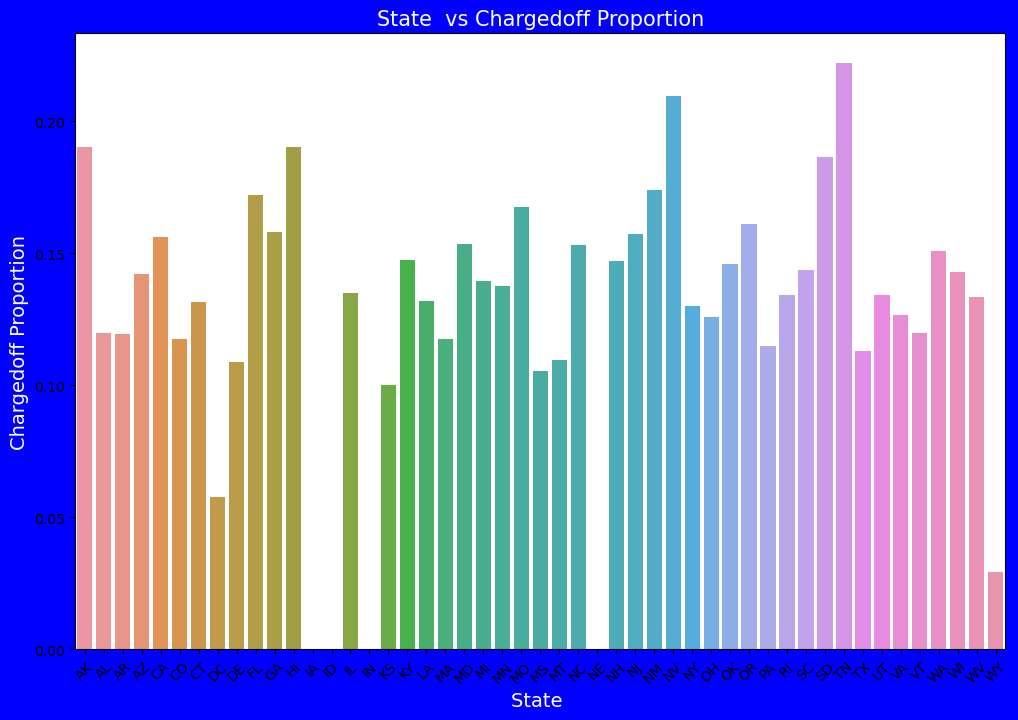

In [161]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [162]:
# Observations:
# DE States is holding highest number of loan defaults.
# CA is having low number of loan defaults

In [163]:
#Bivariate Analysis on Grade against Chargedoff_Proportion 

grade_vs_loan = df_loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,55,104,159,0.345912
5,F,220,480,700,0.314286
4,E,557,1518,2075,0.268434
3,D,941,3329,4270,0.220375
2,C,1177,5702,6879,0.171100
1,B,1225,8857,10082,0.121504
0,A,539,8487,9026,0.059716


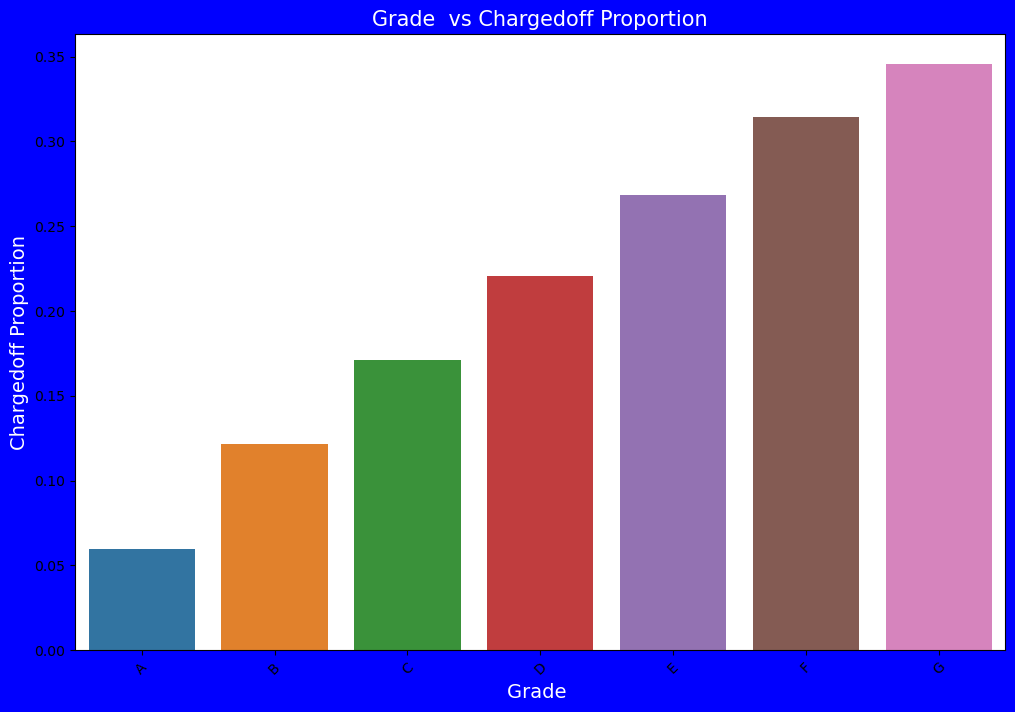

In [164]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [165]:
# observations :
# The Loan applicants with loan Grade G is having higest Loan Defaults.
# The Loan applicants with loan A is having lowest Loan Defaults.

In [166]:
df_loan.dtypes

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
int_rate_b                      object
annual_inc_b                    object
dti_b                           object
loan_amnt_b                     object
dtype: object

In [167]:
#Below columns dropping based on analysis
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
df_loan.drop(columns=drop_columns)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,int_rate_b,annual_inc_b,dti_b,loan_amnt_b
0,5000.0,5000.0,4975.0,36,10.65,B,10+ years,RENT,24000.0,Verified,...,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Low,0 - 40k,Very High,0 - 5K
1,2500.0,2500.0,2500.0,60,15.27,C,< 1 year,RENT,30000.0,Source Verified,...,Charged Off,car,309xx,GA,1.00,0.0,Very High,0 - 40k,Very Low,0 - 5K
2,2400.0,2400.0,2400.0,36,15.96,C,10+ years,RENT,12252.0,Not Verified,...,Fully Paid,small_business,606xx,IL,8.72,0.0,Very High,0 - 40k,Low,0 - 5K
3,10000.0,10000.0,10000.0,36,13.49,C,10+ years,RENT,49200.0,Source Verified,...,Fully Paid,other,917xx,CA,20.00,0.0,High,40k - 50k,High,5K - 10K
5,5000.0,5000.0,5000.0,36,7.90,A,3 years,RENT,36000.0,Source Verified,...,Fully Paid,wedding,852xx,AZ,11.20,0.0,Very Low,0 - 40k,Low,0 - 5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800.0,4800.0,1100.0,36,10.28,C,1 year,RENT,35000.0,Not Verified,...,Fully Paid,debt_consolidation,226xx,VA,7.51,1.0,Low,0 - 40k,Very Low,0 - 5K
39573,7000.0,7000.0,1000.0,36,10.59,C,3 years,MORTGAGE,63500.0,Not Verified,...,Fully Paid,debt_consolidation,853xx,AZ,8.50,1.0,Low,60k to 70k,Low,5K - 10K
39623,9000.0,9000.0,700.0,36,12.49,D,8 years,MORTGAGE,39000.0,Not Verified,...,Charged Off,debt_consolidation,207xx,MD,5.08,1.0,Moderate,0 - 40k,Very Low,5K - 10K
39666,15450.0,15450.0,600.0,36,11.22,C,2 years,MORTGAGE,40000.0,Not Verified,...,Charged Off,debt_consolidation,201xx,VA,13.50,1.0,Moderate,0 - 40k,Moderate,15K - above


<Axes: xlabel='term', ylabel='loan_amnt'>

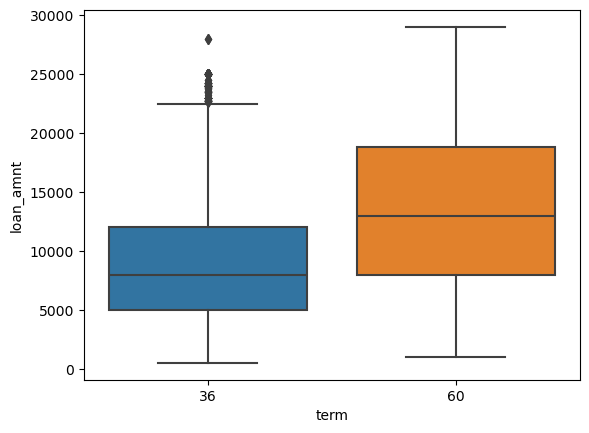

In [169]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=df_loan)

In [ ]:
#from the above graph we can see that if term is increasing loan amount is also increasing